<img src="P4_16.jpg" style="width=200px" />

A planar 4R manipulator is shown in figure (4.15, Craig J. J). The non-zero link parameters are $a_1=1$, $\alpha_2 = 45^o$, $d_3=\sqrt{2}$, and $a_3=\sqrt{2}$. The linkage is pictured in the configuration corresponding to $\Theta=\left[ 0^\circ,+90^\circ, -90^\circ, 0^\circ\right]^T$. Each joint has $\pm 180^\circ$ as joint limits. Find all the values of $\theta_3$ such that 
$$
\boldsymbol{r}^{0}_{P_4/O_0} = \left[1.1, 1.5, 1.707\right]^T
$$

In [1]:
import sympy as sy
import numpy as np
sy.init_printing()



In [2]:
# Link D-H parameters
a_0 = 0
a_1 = 1
a_2 = 0
a_3 = np.sqrt(2)

alpha_0 = 0
alpha_1 = 0
alpha_2 = np.pi/4
alpha_3 = 0


In [3]:
# Joint D-H parameters
theta_1 = sy.Symbol(r'\theta_1')
theta_2 = sy.Symbol(r'\theta_2')
theta_3 = sy.Symbol(r'\theta_3')

d_1=0
d_2=0
d_3=np.sqrt(2)

In [4]:
# transformation  of i' frame with respect to i frame

def link_transform(a_i, alpha_i):
    Link_T = sy.Matrix([[1, 0, 0, a_i], [0, sy.cos(alpha_i), -sy.sin(alpha_i), 0], [0, sy.sin(alpha_i), sy.cos(alpha_i), 0], \
                   [0,0,0,1] ])
    return Link_T

In [5]:
# transformation of i frame with respect to (i-1)' frame'
def joint_transform(d_i, theta_i):
    Joint_T = sy.Matrix([[sy.cos(theta_i),  -sy.sin(theta_i), 0, 0], 
                        [sy.sin(theta_i),  sy.cos(theta_i), 0, 0], 
                        [0, 0, 1, d_i],
                        [0,0,0,1] ])
    return Joint_T

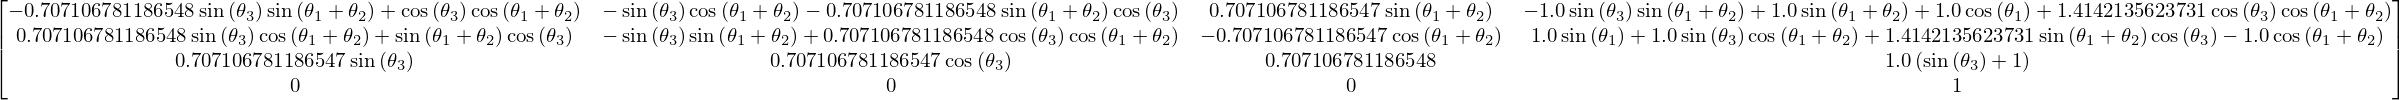

In [6]:
T_0 = sy.Identity(4)
T_1 = T_0*link_transform(a_0, alpha_0)*joint_transform(d_1, theta_1); 
T_2 = T_1*link_transform(a_1, alpha_1)*joint_transform(d_2, theta_2); 
T_3 = T_2*link_transform(a_2, alpha_2)*joint_transform(d_3, theta_3);
T_4_ = T_3*link_transform(a_3, alpha_3)
sy.trigsimp(T_4_)

The last column of the above matrix gives position of point P4